# Notebook Instructions

1. If you are new to Jupyter notebooks, please go through this introductory manual <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank">here</a>.
1. Any changes made in this notebook would be lost after you close the browser window. **You can download the notebook to save your work on your PC.**
1. Before running this notebook on your local PC:<br>
i.  You need to set up a Python environment and the relevant packages on your local PC. To do so, go through the section on "**Run Codes Locally on Your Machine**" in the course.<br>
ii. You need to **download the zip file available in the last unit** of this course. The zip file contains the data files and/or python modules that might be required to run this notebook.

# Volatility and Maximum Drawdown

In this notebook, you will learn how to calculate volatility and maximum drawdown. The notebook is divided into the following parts.

1. [Read Price Data](#read)
2. [Calculate Volatility](#volatility)
3. [Calculate Drawdown](#drawdown)

# Import libraries

In [1]:
# For data manipulation
import numpy as np
import pandas as pd

# For plotting
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')

<a id='read'></a> 
## Read Price Data

The closing price of SPY ETF and Tesla stock are stored in a CSV file. This is the daily data starting from 2015-01-01 to 2021-06-01. You can download this data from the last unit of this course '**Python Codes and Data**'. You can also download the price data from Yahoo! Finance.

To read a CSV file, you can use the `read_csv` method of pandas. The syntax is shown below.

Syntax: 
```python
import pandas as pd
pd.read_csv(filename, index_col)
```

Parameters:
- filename: Name of the file in the string format
- index_col: Column number to set as index

Returns:
- Dataframe

In [2]:
# The data is stored in the directory data_modules
path = '../data_modules/'

# Read price data
price_data = pd.read_csv(path + 'price_data_2010_2021.csv', index_col=0)

# Convert the index to datetime format
price_data.index = pd.to_datetime(price_data.index)

price_data.head()

,SPY,TSLA
Date,,
2014-12-31,205.539993,44.481998
2015-01-02,205.429993,43.862000
2015-01-05,201.720001,42.018002
2015-01-06,199.820007,42.256001
2015-01-07,202.309998,42.189999


<a id='volatility'></a>
## Calculate Volatility

Volatility is measured as the standard deviation of the returns. Therefore, to get the volatility of a security, you need to calculate daily returns of security and then the standard deviation of the returns.

To calculate daily returns, we will use the `pct_change` method of pandas.


Syntax: 
```python
DataFrame.pct_change()
```

Returns:
- Dataframe

In [3]:
# Calculate daily returns of SPY and Tesla
price_data['spy_daily_returns'] = price_data['SPY'].pct_change()
price_data['tsla_daily_returns'] = price_data['TSLA'].pct_change()
price_data.head()

,SPY,TSLA,spy_daily_returns,tsla_daily_returns
Date,,,,
2014-12-31,205.539993,44.481998,NaN,NaN
2015-01-02,205.429993,43.862000,-0.000535,-0.013938
2015-01-05,201.720001,42.018002,-0.018060,-0.042041
2015-01-06,199.820007,42.256001,-0.009419,0.005664
2015-01-07,202.309998,42.189999,0.012461,-0.001562


### Calculate standard deviation of returns

We will calculate the rolling standard deviation of the daily returns using the `rolling` and `std()` methods.

Syntax: 
```python
DataFrame.rolling(window).std()
```

Parameters:
- window: lookback period for which you want to calculate rolling standard deviation

Returns:
- Dataframe

In [4]:
# Calculate rolling standard deviation of SPY and Tesla
price_data['spy_volatility'] = price_data['spy_daily_returns'].rolling(
    252).std()

price_data['tsla_volatility'] = price_data['tsla_daily_returns'].rolling(
    252).std()

# Drop NaN values
price_data = price_data.dropna()

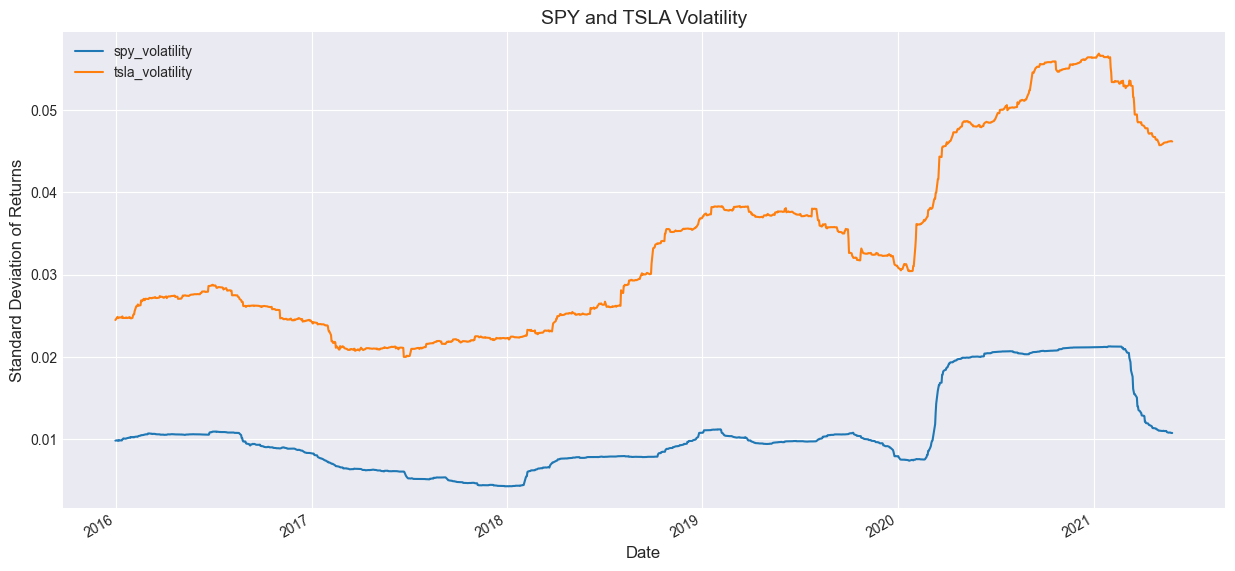

In [5]:
# Plot Volatility of SPY and Tesla
price_data[['spy_volatility', 'tsla_volatility']].plot(figsize=(15, 7))

# Set the title and axes labels
plt.title('SPY and TSLA Volatility', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Standard Deviation of Returns', fontsize=12)
plt.show()

The above chart shows that Tesla stock returns have large variation compared to the SPY ETF returns. Hence, you can say that Tesla stock is more volatile than SPY ETF.

Also, around March 2020, volatility in both securities have increased drastically. This is due to the COVID-19 pandemic. Whenever there is uncertainty in the market, the volatility increases. 

<a id='drawdown'></a>
# Calculate Drawdown

Maximum drawdown informs the maximum loss of a trading system. Drawdown can be measured as the loss of a value from its peak. The peak value at any given time is calculated using the running maximum value. 


Drawdown is given by the below formula:
 

$$ Drawdown  = (\frac{Value} {Running~maximum~value} - 1) *100 $$

In Python, we will use `maximum` and `accumulate` methods to calculate the peak or running maximum value of a series over a period. 


Syntax: 
```python
numpy.maximum.accumulate()
```

Returns:
- The running maximum value of a series from the past period

In [6]:
def calc_drawdown(price):

    # Calculate the running maximum
    running_max = np.maximum.accumulate(price.dropna())

    # Ensure the value never drops below 1
    running_max[running_max < 1] = 1

    # Calculate the drawdown
    drawdown = (price)/running_max - 1
    return drawdown


def plot_drawdown(drawdown, graph_title):
    
    # Plot drawdown
    plt.figure(figsize=(15, 7))
    drawdown.plot(color='r')
    plt.ylabel('Drawdown', fontsize=12)
    plt.xlabel('Year-Month', fontsize=12)
    plt.title(graph_title, fontsize=14)
    plt.fill_between(drawdown.index, drawdown.values, color='red')
    plt.grid(which="major", color='k', linestyle='-.', linewidth=0.2)

    plt.show()

The maximum drawdown of SPY is -34.10


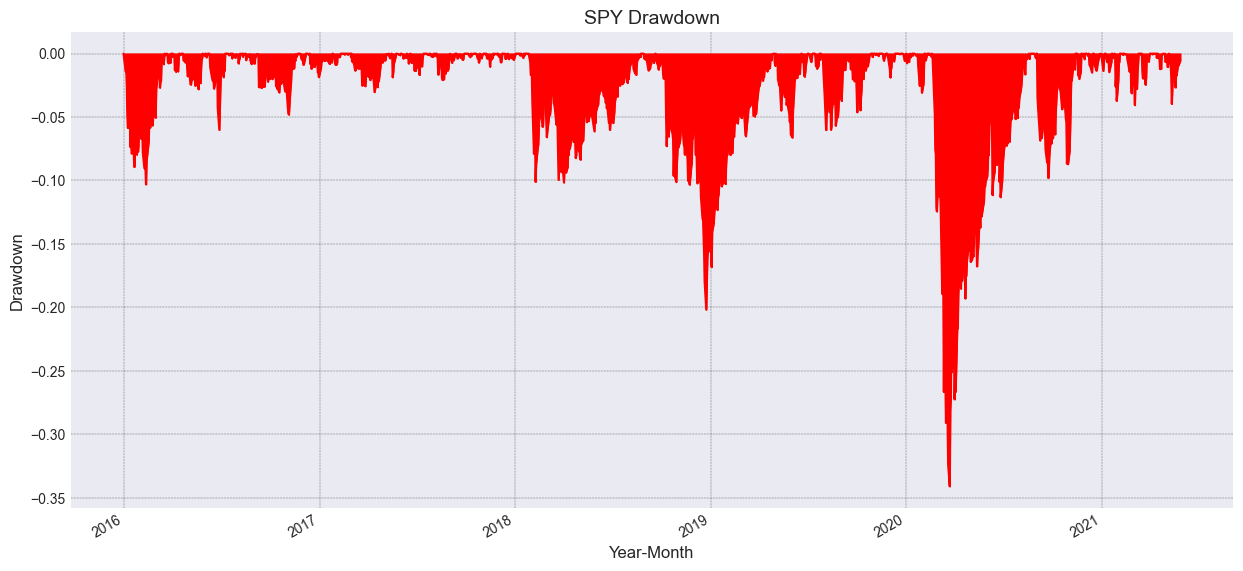

In [7]:
# Calculate drawdown of SPY
drawdown_spy = calc_drawdown(price_data['SPY'])

# Calculate maximum drawdown of SPY
max_dd_spy = drawdown_spy.min()*100
print("The maximum drawdown of SPY is %.2f" % max_dd_spy)

# Plot SPY drawdown
plot_drawdown(drawdown_spy, 'SPY Drawdown')

The maximum drawdown of Tesla is -60.63


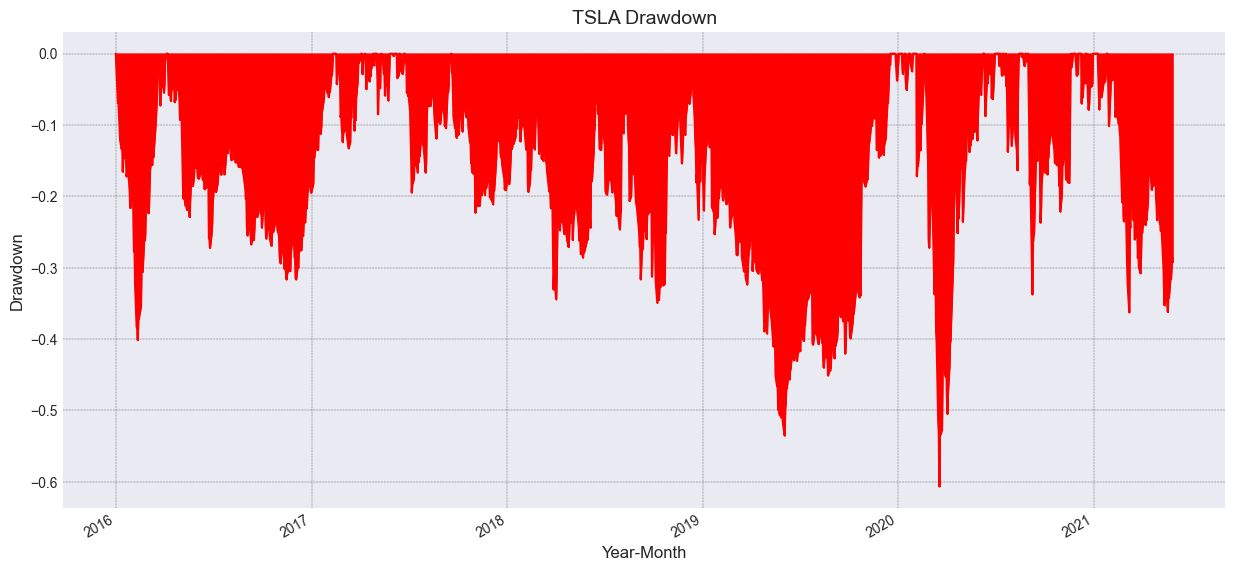

In [8]:
# Calculate drawdown of Tesla
drawdown_tsla = calc_drawdown(price_data['TSLA'])

# Calculate maximum drawdown of Tesla
max_dd_tsla = drawdown_tsla.min()*100
print("The maximum drawdown of Tesla is %.2f" % max_dd_tsla)

# Plot Tesla drawdown
plot_drawdown(drawdown_tsla, 'TSLA Drawdown')

From the above output, you can conclude that the maximum drawdown of the Tesla stock is more than the SPY ETF. This means that investing in Tesla stock is riskier than the SPY.

In the upcoming section, you will learn to create a trading strategy and calculate its volatility, maximum drawdown and other performance metrics.<br><br>